# <center>**Análise Exploratória**</center>

O propósito deste notebook é conduzir uma análise exploratória dos dados, buscando compreender quais variáveis têm maior influência na previsão do resultado de lutas em um card completo do UFC.

### Bibliotecas

Importação de todas as bibliotecas utilizadas no projeto.

In [1]:
# Importando Bibliotecas

# Manipulação de dados
import pandas as pd
import numpy as np

# Diretorio
import os

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

##  `Importando Dataframes`

Realizando a importação dos dataframes que serão utilizados na modelagem.

Para importar os dataframes, primeiramente será necessario realizar uma mudança momentanea no diretorio, para importar e executar o scrip ufc_.

In [2]:
# Alterando o diretorio para a pasta webscraping
os.chdir("../webscaping")

# Importando o scrip ufc.scrap
import ufc_scrap as ufc

# Executando os dataframes
df_events = ufc.get_events()
df_fighters = ufc.get_fighters()
df_fights = ufc.get_fights()

# Retornando ao diretorio atual
os.chdir("../analise_exploratoria")

df_events

,event_id,event,date,city,state,country
0,EVE0664,UFC Fight Night: Fiziev vs. Gamrot,2023-09-23,Las Vegas,Nevada,USA
1,EVE0663,UFC Fight Night: Grasso vs. Shevchenko 2,2023-09-16,Las Vegas,Nevada,USA
2,EVE0662,UFC 293: Adesanya vs. Strickland,2023-09-09,Sydney,New South Wales,Australia
3,EVE0661,UFC Fight Night: Gane vs. Spivac,2023-09-02,Paris,Ile-de-France,France
4,EVE0660,UFC Fight Night: Holloway vs. The Korean Zombie,2023-08-26,Kallang,NaN,Singapore
...,...,...,...,...,...,...
659,EVE0005,UFC 6: Clash of the Titans,1995-07-14,Casper,Wyoming,USA
660,EVE0004,UFC 5: The Return of the Beast,1995-04-07,Charlotte,North Carolina,USA
661,EVE0003,UFC 4: Revenge of the Warriors,1994-12-16,Tulsa,Oklahoma,USA
662,EVE0002,UFC 3: The American Dream,1994-09-09,Charlotte,North Carolina,USA


In [3]:
# Visualizando df_fighters

df_fighters

,First,Last,Nickname,Stance,Belt,height,reach,weight,win,lose,draw,total_fights,fighters_id
0,Tom,Aaron,NaN,NaN,NaN,NaN,NaN,70.307,5,3,0,8,FIG3286
1,Danny,Abbadi,The Assassin,Orthodox,NaN,180.34,NaN,70.307,4,6,0,10,FIG2942
2,Nariman,Abbasov,Bayraktar,Orthodox,NaN,172.72,167.64,70.307,28,4,0,32,FIG0482
3,David,Abbott,Tank,Switch,NaN,182.88,NaN,120.202,10,15,0,25,FIG0923
4,Hamdy,Abdelwahab,The Hammer,Southpaw,NaN,187.96,182.88,119.748,5,0,0,5,FIG3664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,Dave,Zitanick,NaN,NaN,NaN,NaN,NaN,77.111,5,7,0,12,FIG2609
4105,Alex,Zuniga,NaN,NaN,NaN,NaN,NaN,65.771,6,3,0,9,FIG3121
4106,George,Zuniga,NaN,NaN,NaN,175.26,NaN,83.915,3,1,0,4,FIG3843
4107,Allan,Zuniga,Tigre,Orthodox,NaN,170.18,177.80,70.307,13,1,0,14,FIG2267


In [15]:
# Visualizando df_fights
df_fights

,event_id,weight_class,w/l,fighter1,fighter2,kd_fighter1,kd_fighter2,str_fighter1,str_fighter2,td_fighter1,td_fighter2,sub_fighter1,sub_fighter2,method,round,time
0,EVE0663,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,1,0,84,80,1,4,1,1,S-DEC,5,5:00
1,EVE0663,Welterweight,win,Jack Della Maddalena,Kevin Holland,0,0,105,127,0,0,0,0,S-DEC,3,5:00
2,EVE0663,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,1,0,18,6,0,0,0,0,KO/TKO_Punches,1,0:54
3,EVE0663,Lightweight,win,Daniel Zellhuber,Christos Giagos,0,0,36,38,0,0,1,0,SUB_Anaconda_Choke,2,3:26
4,EVE0663,Featherweight,win,Kyle Nelson,Fernando Padilla,0,0,82,72,0,0,0,0,U-DEC,3,5:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,Open Weight,win,Orlando Wiet,Robert Lucarelli,0,0,8,2,0,1,0,1,KO/TKO,1,2:50
7336,EVE0001,Open Weight,win,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,SUB_Keylock,1,4:52
7337,EVE0001,Open Weight,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,KO/TKO_Punches,1,12:13
7338,EVE0001,Open Weight,win,Patrick Smith,Ray Wizard,0,0,1,1,0,0,1,0,SUB_Guillotine_Choke,1,0:58


## `Análise de Eventos`

Realizando uma analise dos eventos já realizados pelo UFC.

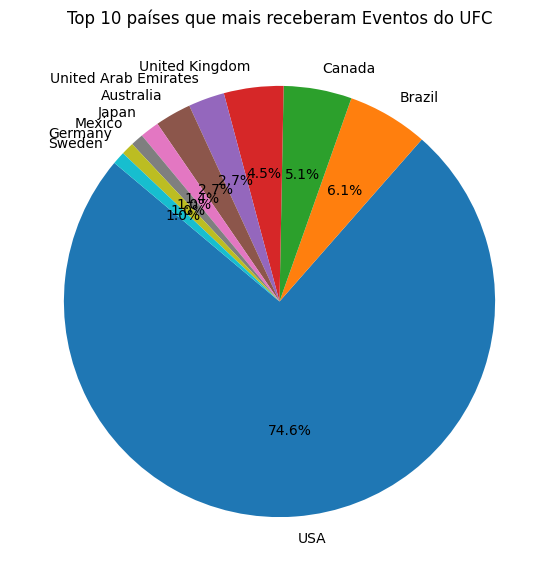

In [26]:
# Países que mais receberam eventos do UFC
df_events['country'].value_counts().head(10)

# Plotando gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(df_events['country'].value_counts().head(10), labels=df_events['country'].value_counts().head(10).index, autopct='%1.1f%%', startangle=140)

plt.title('Top 10 países que mais receberam Eventos do UFC')


plt.show()

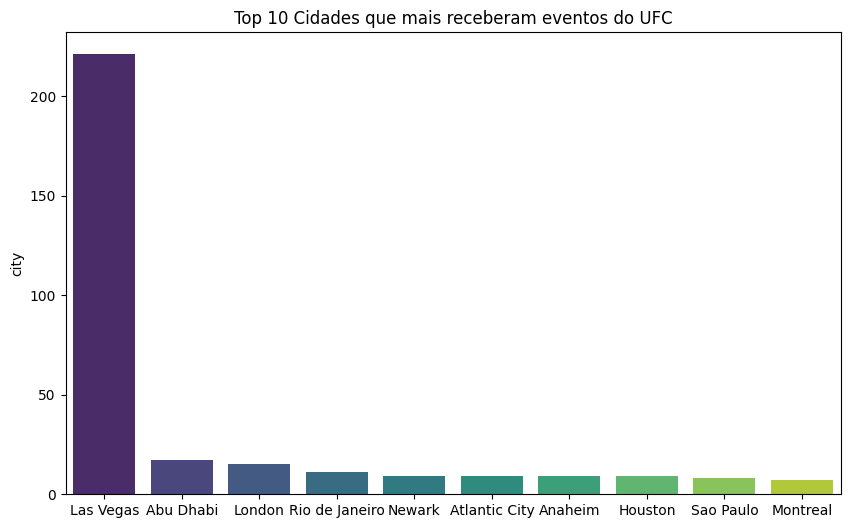

In [30]:
# Cidades com mais eventos
plt.figure(figsize=(10,6))
sns.barplot(x=df_events['city'].value_counts().head(10).index, y=df_events['city'].value_counts().head(10), palette='viridis')
plt.title('Top 10 Cidades que mais receberam eventos do UFC')
plt.show()

In [29]:
df_events['city'].value_counts().head(10)

Las Vegas         221
Abu Dhabi          17
London             15
Rio de Janeiro     11
Newark              9
Atlantic City       9
Anaheim             9
Houston             9
Sao Paulo           8
Montreal            7
Name: city, dtype: int64

A principio nenhuma informação contida na tabela de evetos será utilizada no dataframe final.

## `Pré-Processamento`

A princio será utilizada duas abordagens diferentes para tentar predizer o resultado das lutas do UFC. 

- **Abordagem 1**:
A primeria estratégia colocará ambos os lutadores na mesma linha, e o modelo tentará prever se o lutador 1, o lutador 2 ou nenhum deles sairá vitorioso. Essa abordagem requer menos manipulações no dataframe e processa os dados de forma mais direta.

- **Abordagem 2**:
A segunda abordagem buscará prever a probabilidade de vitória para cada um dos lutadores. Em outras palavras, cada lutador estará representado em uma linha distinta, e o modelo tentará prever se ele irá vencer, perder, empatar ou obter um resultado "no contest", com base em variáveis comparativas, como a diferença de altura e alcance. Essa abordagem tende a enfatizar a interpretação das variáveis preditoras e seu impacto no desfecho da luta.




### **Abordagem 1**

Essa abordagem se alinha mais com a atual configuração dos dataframes, exigindo menos ajustes para se obter o dataframe final.

Primeiro, será preciso fazer algumas correções no df_fights, que servirá como base para o df_abordagem1, alimentando assim o modelo de classificação. O resultado previsto por esse modelo será: 1 (se o lutador 1 venceu), 2 (se o lutador 2 venceu) ou 3 (se nenhum dos dois venceu). Para atingir isso, algumas modificações e processamentos serão necessários na base de dados.

In [10]:
df_fights

,event_id,weight_class,w/l,fighter1,fighter2,kd_fighter1,kd_fighter2,str_fighter1,str_fighter2,td_fighter1,td_fighter2,sub_fighter1,sub_fighter2,method,round,time
0,EVE0663,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,1,0,84,80,1,4,1,1,S-DEC,5,5:00
1,EVE0663,Welterweight,win,Jack Della Maddalena,Kevin Holland,0,0,105,127,0,0,0,0,S-DEC,3,5:00
2,EVE0663,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,1,0,18,6,0,0,0,0,KO/TKO_Punches,1,0:54
3,EVE0663,Lightweight,win,Daniel Zellhuber,Christos Giagos,0,0,36,38,0,0,1,0,SUB_Anaconda_Choke,2,3:26
4,EVE0663,Featherweight,win,Kyle Nelson,Fernando Padilla,0,0,82,72,0,0,0,0,U-DEC,3,5:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,Open Weight,win,Orlando Wiet,Robert Lucarelli,0,0,8,2,0,1,0,1,KO/TKO,1,2:50
7336,EVE0001,Open Weight,win,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,SUB_Keylock,1,4:52
7337,EVE0001,Open Weight,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,KO/TKO_Punches,1,12:13
7338,EVE0001,Open Weight,win,Patrick Smith,Ray Wizard,0,0,1,1,0,0,1,0,SUB_Guillotine_Choke,1,0:58


### **Abordagem 2**

O dataframe destinado à modelagem difere dos dataframes extraídos do site UFCstats via webscraping. Serão necessários ajustes e tratamentos específicos para construir o dataframe final que empregaremos na modelagem.

A principio utlizaremos como base o dataframe final abaixo:

<p align="center">
  <img src="imagens\exemplo_df_model.JPG" alt="Descrição da Imagem" width="50%"/>
</p>


### **df_fights**

A primeira etapa a ser realizada é examinar a inclusão do histórico de lutas de cada lutador. No dataframe df_fights, temos informações futuras. Quando o modelo for prever o resultado de uma luta, detalhes como knockdowns, strikes e takedowns ainda não estarão disponíveis, pois a luta ainda não ocorreu. Portanto, esses valores devem ser integrados ao histórico do respectivo lutador para que possam ser levados em conta no modelo.

Um desafio adicional ao considerar o histórico de lutas de cada lutador, como strikes, knockdowns, takedowns e submissions, é a necessidade de considerar o aspecto temporal. Isso significa que não podemos simplesmente usar o histórico atual de um lutador para suas lutas passadas que serão utilizadas para treinar o modelo. Para abordar esta questão, precisaremos construir o histórico de cada lutador levando em conta a progressão temporal.

In [32]:
df_fights["w/l"].value_counts()

win     7207
nc        77
draw      56
Name: w/l, dtype: int64